# Proyecto 2
## Problema Minimum Coin Change

**Importar librerias**

In [9]:
import io
import sys
import cProfile
import pstats
import matplotlib.pyplot as plt

## Implementación del algoritmo con Dynamic Programming
El resultado del algoritmo es una matriz donde el eje vertical (eje y) representa las denominaciones de las monedas, ordenadas de menor a mayor. El valor en una casilla con coordenadas (x, y) representa el número mínimo de monedas necesarias para formar el valor x utilizando todas las monedas con denominaciones menores o iguales a y. Por lo tanto, el resultado final del algoritmo es el número ubicado en la esquina inferior derecha de la matriz. Este número indica el mínimo número de monedas necesarias para formar el valor deseado con las monedas disponibles.

In [10]:
def init_table(coins: [int], amount: int):
    table = [[0]*(amount+1) for _ in range(len(coins))]

    for i in range(len(table[0])):
        table[0][i] = i

    return table

# the amounts MUST include a 1 cent coin
# the coins list MUST be sorted
def minCoinChangeDP(coins: [int], amount: int):    
    table = init_table(coins, amount)

    for row in range(1, len(coins)):
        for col in range(amount+1):
            if col < coins[row]:
                table[row][col] = table[row-1][col]
            else:
                table[row][col] = min(table[row-1][col], 1 + table[row][col-coins[row]])

    return table


coins = [1,3,4,5]
amount = 7
table = minCoinChangeDP(coins, amount)

print(f"La cantidad minima de monedas para dar cambio de {amount} es: {table[-1][-1]} monedas")

La cantidad minima de monedas para dar cambio de 7 es: 2 monedas


## Implementacion con Divide y Conquista

In [11]:
def minCoinChangeDAC(coin, K):
    m = len(coin)
    # Caso base: Cuando el total K es 0, se necesitan 0 monedas
    if K == 0:
        return 0

    # Inicializar minCount con un valor muy grande
    minCount = sys.maxsize

    # Probar cada moneda que tiene un valor menor o igual a K
    for i in range(m):
        if coin[i] <= K:
            # Encontrar de forma recursiva el número de monedas necesarias para el monto restante
            currCount = minCoinChangeDAC(coin, K - coin[i])

            # Si el número de monedas necesarias para el monto restante no es infinito,
            # y es menor que el minCount actual, actualizar minCount
            if currCount != sys.maxsize and currCount + 1 < minCount:
                minCount = currCount + 1

    # Si minCount no ha sido actualizado, devolver -1 para indicar fallo
    if minCount == sys.maxsize:
        return -1
    else:
        return minCount

In [12]:
# Probando la funcion

# Listado de monedas disponibles
coins = [1, 3, 4, 5]

# Cantidad total
K = 7

# Imprimir el resultado
print(f"La cantidad minima de monedas para un cambio de {K} es: {minCoinChangeDAC(coins, K)} monedas")

La cantidad minima de monedas para un cambio de 7 es: 2 monedas


**Referencias:**
- https://www.enjoyalgorithms.com/blog/minimum-coin-change
- https://www.boardinfinity.com/blog/coin-change-problem-with-dp-and-recursion-approach/

## Analisis Empirico

**Profiler de funciones**

In [13]:
def profile_function(func, coins, K_values):
    times = []
    results = []
    
    for K in K_values:
        profiler = cProfile.Profile()
        profiler.enable()
        
        # Ejecuta la funcion con el valor K actual
        result = func(coins, K)
        results.append(result)
        
        # Deshabilita el profiler y recolecta los datos
        profiler.disable()
        s = io.StringIO()
        ps = pstats.Stats(profiler, stream=s).sort_stats('time')
        ps.print_stats()
        
        # Toma el tiempo total
        times.append(ps.total_tt)

    # Retorna la lista de resultados y tiempos en milisegundos
    return results, [time * 1000 for time in times]

**Definicion de entradas y parametros**

In [14]:
# Definicion de valores de K
K_values = list(range(1, 31))  # K de 1 a 30

# Lista de denominaciones de monedas
coins = [1, 3, 4, 5]

### Analisis de implementacion con Divide y Conquista

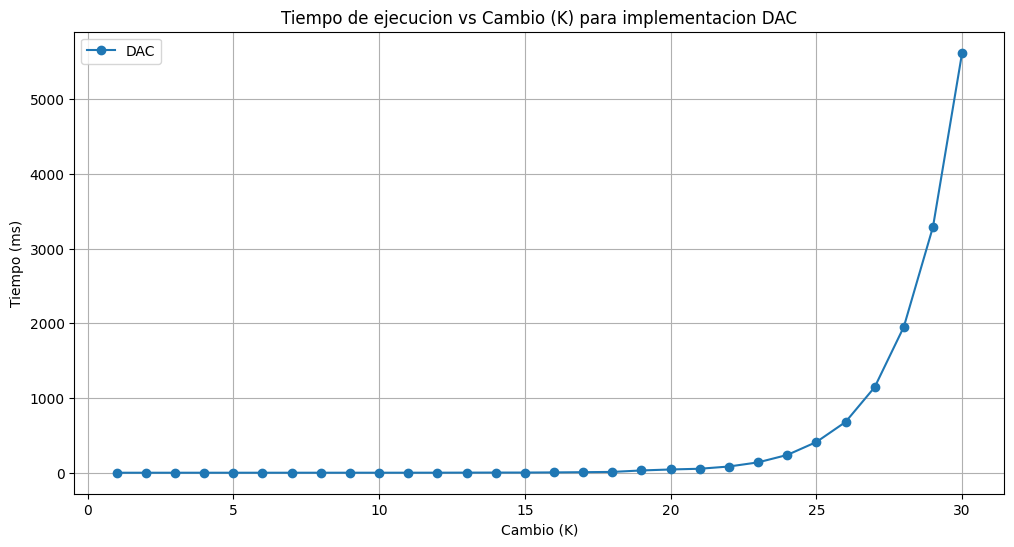

In [15]:
# Perfilamiento de la funcion con divide y conquista
results_recursive, times_recursive = profile_function(minCoinChangeDAC, coins, K_values)

# Graficar los tiempos de ejecucion
plt.figure(figsize=(12, 6))
plt.plot(K_values, times_recursive, label='DAC', marker='o')
plt.xlabel('Cambio (K)')
plt.ylabel('Tiempo (ms)')
plt.title('Tiempo de ejecucion vs Cambio (K) para implementacion DAC')
plt.legend()
plt.grid(True)
plt.show()


La gráfica muestra que los tiempos de ejecución se mantienen relativamente constantes y bajos para valores pequeños de  K, lo cual es típico de la naturaleza recursiva del algoritmo de divide y conquista que puede manejar casos pequeños con relativa rapidez. Sin embargo, hay un incremento exponencial pronunciado a partir de un cierto punto, alrededor de K = 25. Esto es consistente con la complejidad teórica de la implementación de divide y conquista para este problema, que puede ser exponencial en el peor de los casos debido a la naturaleza de las llamadas recursivas que podrían explorar muchas combinaciones ineficientemente, indicando que la evidencia empírica respalda la teoría.

### Analisis de implementacion con Programacion Dinamica

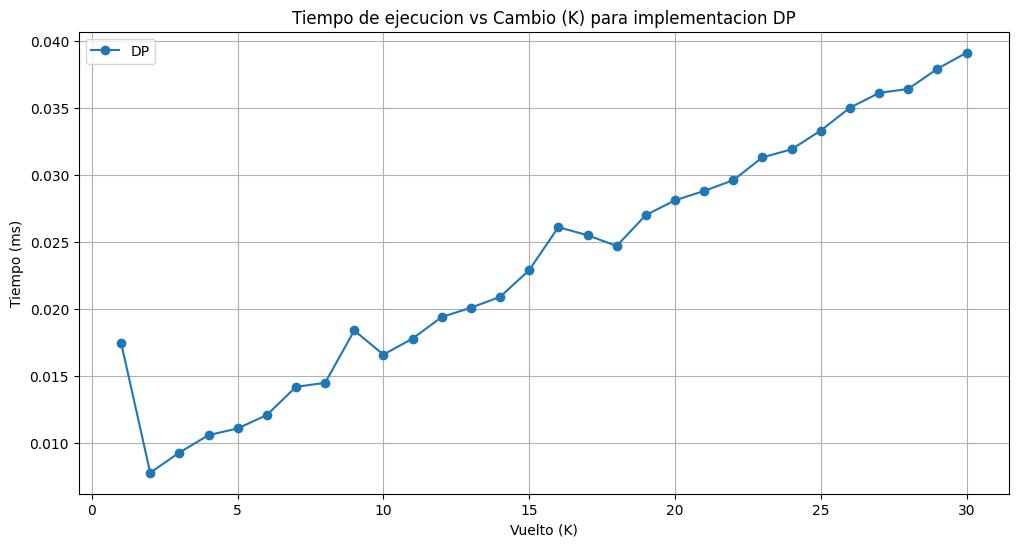

In [22]:
# Perfilamiento de la funcion con programacion dinamica
results_recursive, times_recursive = profile_function(minCoinChangeDP, coins, K_values)

# Graficar los tiempos de ejecucion
plt.figure(figsize=(12, 6))
plt.plot(K_values, times_recursive, label='DP', marker='o')
plt.xlabel('Vuelto (K)')
plt.ylabel('Tiempo (ms)')
plt.title('Tiempo de ejecucion vs Cambio (K) para implementacion DP')
plt.legend()
plt.grid(True)
plt.show()

La grafica muestra un incremento muy lineal en los tiempos de ejecución con respecto a K. Esos pequeños picos en los tiempos de ejecución pueden atribuirse a la latencia del procesador en ese momento.
Este incremento se alinea con la complejidad teórica esperada para una implementación de programación dinámica para este problema. La DP es eficaz aquí porque almacena los resultados de los subproblemas y evita calculo redundante, resultando en una complejidad simple de O(Kn), donde n es la cantidad de denominaciones de monedas.
Esta consistencia entre la teoría y el rendimiento empírico demuestra la eficiencia de la programación dinámica.

### Comparación de Modelos

Al comparar ambas gráficas es evidente que la implementación de la solución por medio de programación dinámica es significativamente mas eficiente que la implementación con divide y conquista. Las diferencias notables en los tiempos de ejecución subrayan la importancia de la elección del algoritmo en la eficiencia computacional para este problema.